# Kraskov-Stogbauer-Grassberger MI estimator + base distributions showcase

In [1]:
import math
import numpy as np

In [2]:
np.random.seed(42)

In [3]:
# Use Kraskov-Stogbauer-Grassberger MI estimator to run example tests.
from mutinfo.estimators.knn import KSG

estimator = KSG()

In [4]:
from utils.plots import *
from utils.tests import *

In [5]:
font = {'size' : 16}
matplotlib.rc('font', **font)

In [6]:
from mutinfo.distributions.base import (
    UniformlyQuantized,
    NoiselessChannel,
    SymmetricNoisyChannel,
)

In [7]:
from mutinfo.distributions.mixing.label import *
from scipy.stats import uniform

In [8]:
MI_grid = np.linspace(0.0, 3.0, 11)
n_samples = 10000
n_runs = 100

X_dim = 2
Y_dim = 3 # Ignored if the distribution does not support unequal dimensionality.

## Symmetric noisy channel

In [9]:
estimated_MI = run_tests(
    lambda mutual_information : mixed_by_label(
        [
            [uniform(loc=i) for i in range(int(math.exp(mutual_information)) + 1)],
            [uniform(loc=i) for i in range(int(math.exp(mutual_information)) + 1)]
        ],
        SymmetricNoisyChannel(mutual_information, permute=True)
    ),
    estimator=estimator,
    MI_grid=MI_grid,
    n_samples=n_samples,
    n_runs=n_runs
)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:53<00:00,  4.90s/it]


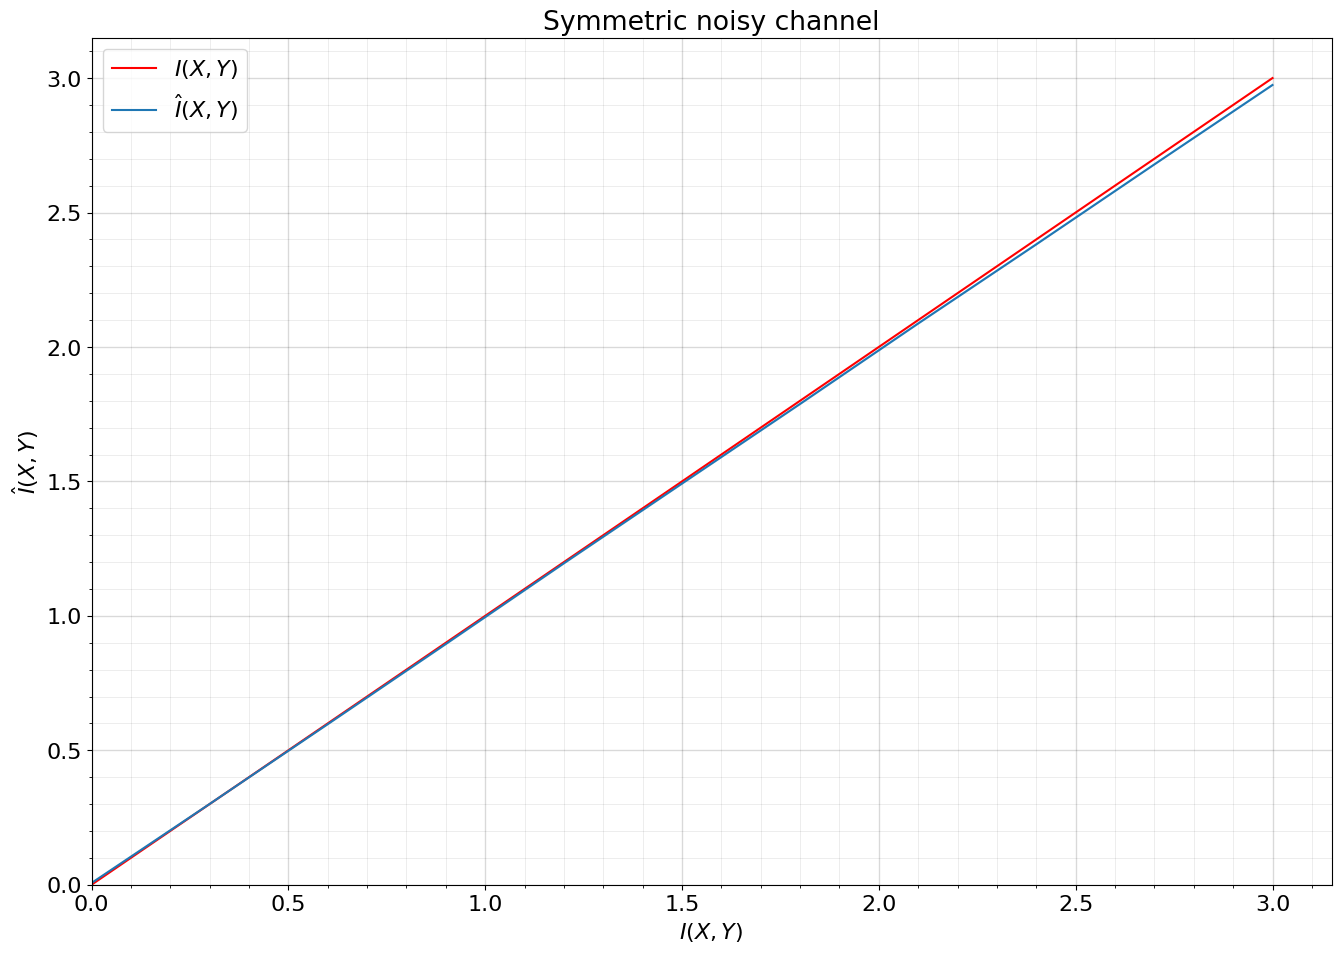

In [10]:
plot_estimated_MI(MI_grid, estimated_MI, "Symmetric noisy channel")

## Noiseless channel

In [11]:
from scipy.stats import norm

estimated_MI = run_tests(
    lambda mutual_information : mixed_by_label(
        [
            [uniform(loc=i) for i in range(int(math.exp(mutual_information)) + 1)],
            [uniform(loc=i) for i in range(int(math.exp(mutual_information)) + 1)]
        ],
        NoiselessChannel(mutual_information, permute=True)),
    estimator=estimator,
    MI_grid=MI_grid,
    n_samples=n_samples,
    n_runs=n_runs
)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:52<00:00,  4.82s/it]


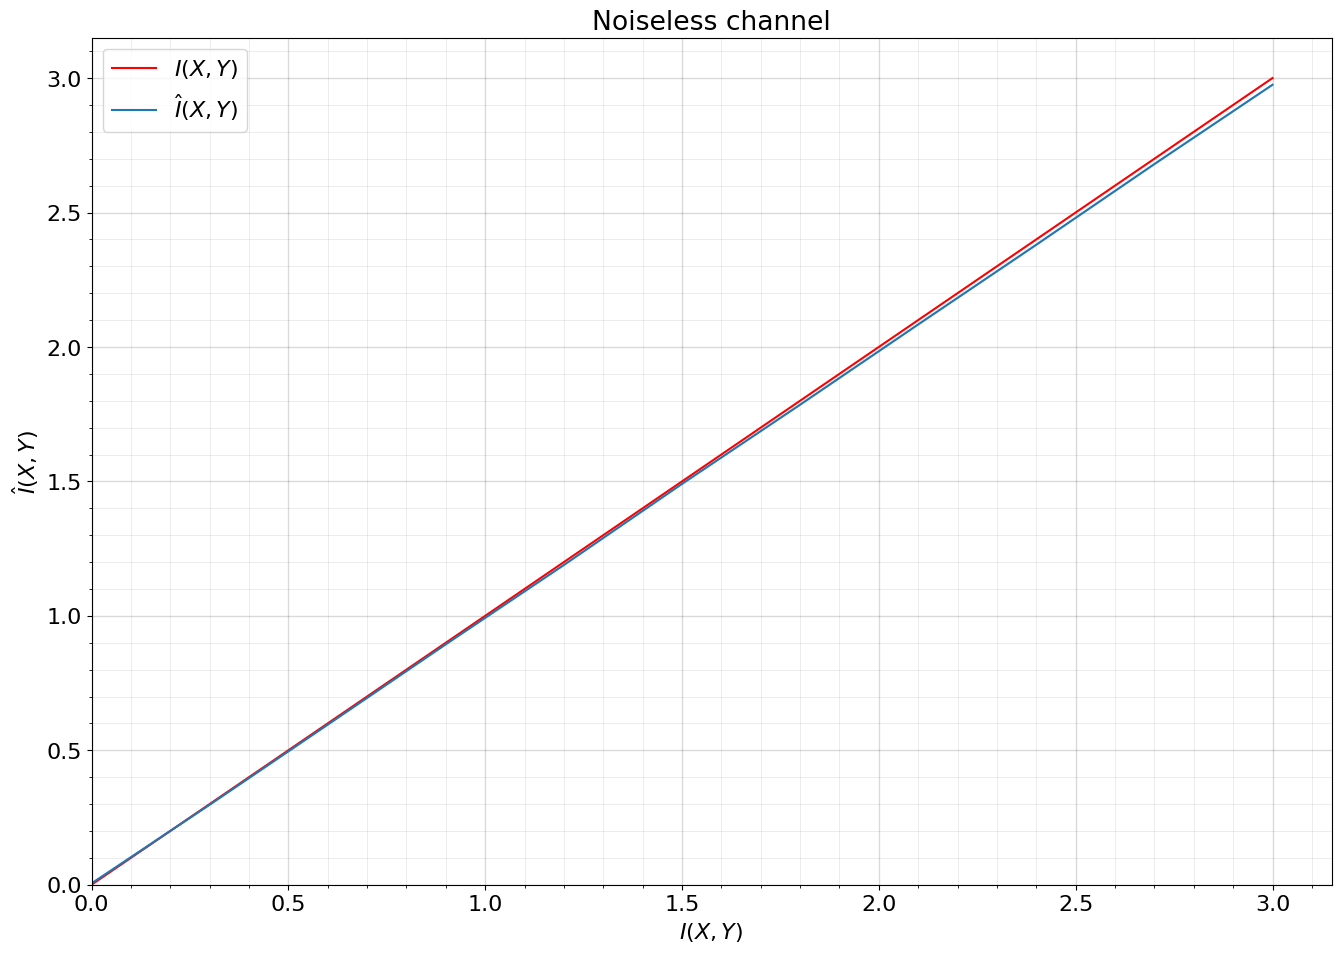

In [12]:
plot_estimated_MI(MI_grid, estimated_MI, f"Noiseless channel")